In [4]:
import pandas as pd

df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,deposit_type,customer_type,adr
0,Resort Hotel,0,342,July,0,0,2,0,No Deposit,Transient,0
1,Resort Hotel,0,737,July,0,0,2,0,No Deposit,Transient,0
2,Resort Hotel,0,7,July,0,1,1,0,No Deposit,Transient,75
3,Resort Hotel,0,13,July,0,1,1,0,No Deposit,Transient,75
4,Resort Hotel,1,14,July,0,2,2,0,No Deposit,Transient,98


In [5]:
df.info()


print("\nMissing values per column:\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hotel                    20 non-null     object
 1   is_canceled              20 non-null     int64 
 2   lead_time                20 non-null     int64 
 3   arrival_date_month       20 non-null     object
 4   stays_in_weekend_nights  20 non-null     int64 
 5   stays_in_week_nights     20 non-null     int64 
 6   adults                   20 non-null     int64 
 7   children                 20 non-null     int64 
 8   deposit_type             20 non-null     object
 9   customer_type            20 non-null     object
 10  adr                      20 non-null     int64 
dtypes: int64(7), object(4)
memory usage: 1.8+ KB

Missing values per column:

hotel                      0
is_canceled                0
lead_time                  0
arrival_date_month         0
stays_in_week

In [6]:

print("Original shape:", df.shape)


df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


df = df[df['children'] >= 0]
print("After removing negative children:", df.shape)


print("\nMissing values:\n", df.isnull().sum())


Original shape: (20, 11)
After removing duplicates: (16, 11)
After removing negative children: (16, 11)

Missing values:
 hotel                      0
is_canceled                0
lead_time                  0
arrival_date_month         0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
deposit_type               0
customer_type              0
adr                        0
dtype: int64


In [7]:

df.head(10)


,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,deposit_type,customer_type,adr
0,Resort Hotel,0,342,July,0,0,2,0,No Deposit,Transient,0
1,Resort Hotel,0,737,July,0,0,2,0,No Deposit,Transient,0
2,Resort Hotel,0,7,July,0,1,1,0,No Deposit,Transient,75
3,Resort Hotel,0,13,July,0,1,1,0,No Deposit,Transient,75
4,Resort Hotel,1,14,July,0,2,2,0,No Deposit,Transient,98
6,Resort Hotel,0,0,July,0,1,1,0,No Deposit,Transient,75
7,Resort Hotel,1,9,July,0,2,2,0,No Deposit,Transient,98
8,Resort Hotel,1,6,July,0,2,2,0,No Deposit,Transient,98
9,Resort Hotel,1,0,July,0,2,2,0,No Deposit,Transient,98
10,Resort Hotel,0,0,July,0,2,2,0,No Deposit,Transient,98


In [8]:

df.to_csv("cleaned_hotel_bookings.csv", index=False)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


In [5]:
import pandas as pd


df = pd.read_csv("hotel_bookings.csv")


df.head()


,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,deposit_type,customer_type,adr
0,Resort Hotel,0,50,July,2,3,2,0,No Deposit,Transient,100
1,City Hotel,1,150,August,1,2,1,1,Non Refund,Contract,200
2,City Hotel,0,20,June,0,1,2,-1,No Deposit,Transient,80
3,Resort Hotel,1,300,May,3,4,2,2,Refundable,Transient-Party,150
4,City Hotel,0,100,April,1,2,1,-2,No Deposit,Group,120


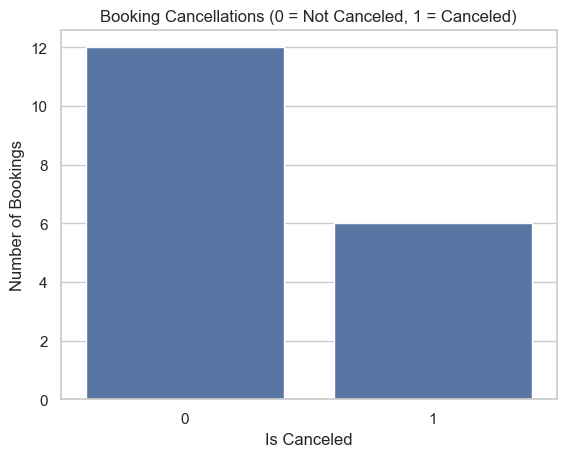

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_canceled', data=df)
plt.title("Booking Cancellations (0 = Not Canceled, 1 = Canceled)")
plt.xlabel("Is Canceled")
plt.ylabel("Number of Bookings")
plt.show()


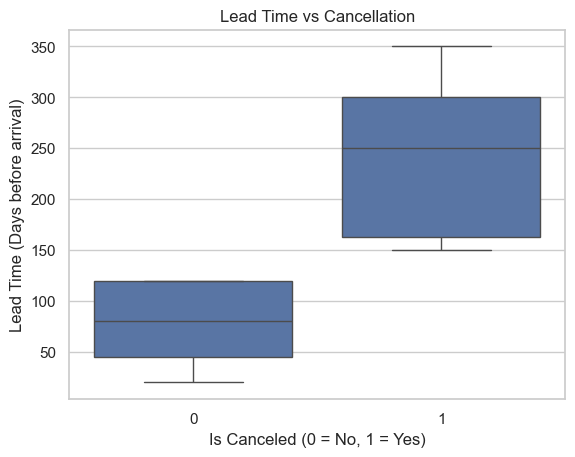

In [7]:

sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs Cancellation")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (Days before arrival)")
plt.show()


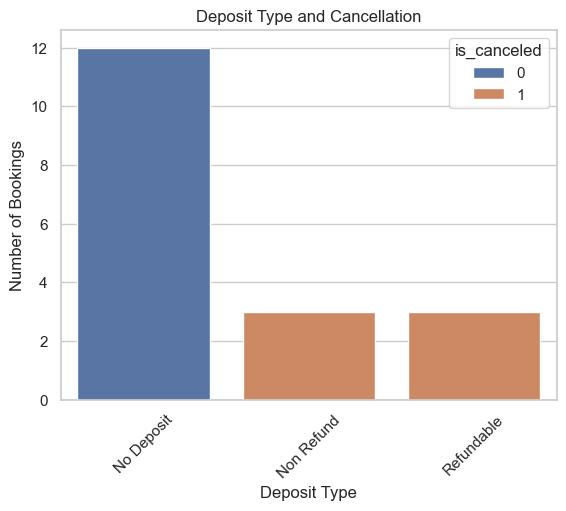

In [8]:

sns.countplot(x='deposit_type', hue='is_canceled', data=df)
plt.title("Deposit Type and Cancellation")
plt.xlabel("Deposit Type")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


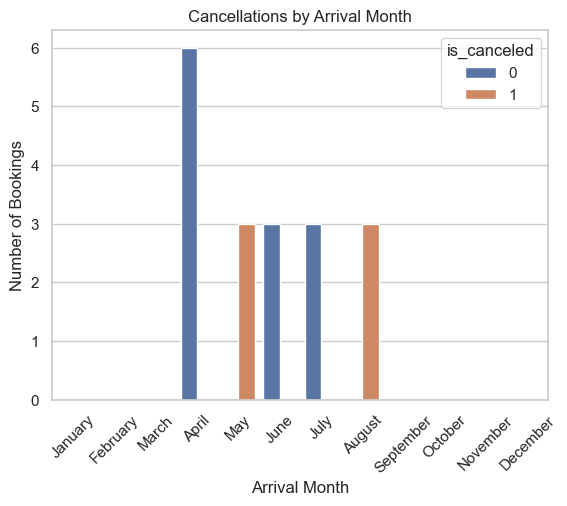

In [9]:

months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']


df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months_order, ordered=True)


sns.countplot(x='arrival_date_month', hue='is_canceled', data=df)
plt.title("Cancellations by Arrival Month")
plt.xlabel("Arrival Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children']
X = df[features]
y = df['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 1.0

 Confusion Matrix:
 [[2 0]
 [0 4]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [12]:

df.to_csv("clean_hotel_bookings.csv", index=False)
